In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
dataset = pd.read_csv(url)

In [3]:
print(dataset.shape)
print(dataset.head())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
dataset = pd.get_dummies(dataset,dtype = int,drop_first = True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [6]:
features = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest']]
Target = dataset[['charges']]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,Target,test_size = 0.30,random_state =  0)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid_tree = {'criterion': ['mse','mae','friedman_mse'],'splitter':['best','random'],'max_features': ['sqrt', 'log2','auto']}
grid_tree =  GridSearchCV(DecisionTreeRegressor(),param_grid_tree,refit = True,verbose = 3, n_jobs = -1)
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Vasant

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [9]:
grid_tree_predict = grid_tree.predict(X_test)
from sklearn.metrics import r2_score
r_score = r2_score(y_test,grid_tree_predict)
print("best r_score = {}".format(r_score))

best r_score = 0.697119942965432


In [10]:
print("best_params = {}".format(grid_tree.best_params_))

best_params = {'criterion': 'friedman_mse', 'max_features': 'log2', 'splitter': 'best'}


In [11]:
print("best R2_score = {}".format(grid_tree.best_score_))

best R2_score = 0.6377106002003777


In [12]:
regressor_tree = grid_tree.cv_results_

In [13]:
table = pd.DataFrame.from_dict(regressor_tree)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002910,0.001691,0.000000,0.000000,mse,sqrt,best,"{'criterion': 'mse', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.002539,0.001246,0.000000,0.000000,mse,sqrt,random,"{'criterion': 'mse', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.001599,0.000799,0.000000,0.000000,mse,log2,best,"{'criterion': 'mse', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.001340,0.000844,0.000000,0.000000,mse,log2,random,"{'criterion': 'mse', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.001691,0.000862,0.000000,0.000000,mse,auto,best,"{'criterion': 'mse', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,0.001552,0.000783,0.000000,0.000000,mse,auto,random,"{'criterion': 'mse', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,0.001878,0.000531,0.000000,0.000000,mae,sqrt,best,"{'criterion': 'mae', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,0.002505,0.000753,0.000000,0.000000,mae,sqrt,random,"{'criterion': 'mae', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,0.002011,0.000887,0.000000,0.000000,mae,log2,best,"{'criterion': 'mae', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9,0.002525,0.001117,0.000000,0.000000,mae,log2,random,"{'criterion': 'mae', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid_rf = {'n_estimators': [100, 200],'max_depth': [None, 10, 20],'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid_rf,refit = True,verbose = 3,n_jobs = -1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=3)

In [15]:
grid_rf_predict = grid_rf.predict(X_test)
from sklearn.metrics import r2_score
r_score = r2_score(y_test,grid_rf_predict)
r_score

0.8793209768345198

In [16]:
print("The best parameter in RF {}".format(param_grid_rf))

The best parameter in RF {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'max_features': ['sqrt', 'log2'], 'min_samples_split': [2, 5]}


In [17]:
print("the best R_score in RF {}".format(grid_rf.best_score_))

the best R_score in RF 0.8286277783628384


In [18]:
re_rf = grid_rf.cv_results_

In [19]:
table_Rf = pd.DataFrame(re_rf)
table_Rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.329139,0.002164,0.020163,0.004453,None,sqrt,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.856271,0.771068,0.808004,0.812074,0.751867,0.799857,0.036139,21
1,0.686540,0.017683,0.050551,0.019588,None,sqrt,2,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.854259,0.774701,0.805712,0.817035,0.758150,0.801971,0.033582,20
2,0.299667,0.037436,0.015741,0.000943,None,sqrt,5,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.848479,0.776392,0.813083,0.820572,0.754231,0.802552,0.033359,19
3,0.578257,0.022962,0.025795,0.001194,None,sqrt,5,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.851688,0.782605,0.807787,0.822972,0.754518,0.803914,0.033331,15
4,0.357588,0.004108,0.018036,0.002690,None,log2,2,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.866021,0.792065,0.824844,0.830074,0.777179,0.818037,0.031105,12
5,0.704721,0.007723,0.026874,0.000734,None,log2,2,200,"{'max_depth': None, 'max_features': 'log2', 'm...",0.871525,0.795325,0.821240,0.839164,0.781040,0.821659,0.032052,9
6,0.301631,0.003872,0.014749,0.001755,None,log2,5,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.871742,0.800954,0.829947,0.844055,0.783204,0.825980,0.031282,6
7,0.614274,0.014464,0.027654,0.001894,None,log2,5,200,"{'max_depth': None, 'max_features': 'log2', 'm...",0.873877,0.802234,0.829511,0.842273,0.784189,0.826417,0.031246,3
8,0.306405,0.007219,0.015536,0.001213,10,sqrt,2,100,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.856585,0.785469,0.816532,0.818395,0.760812,0.807558,0.032480,13
9,0.599688,0.005619,0.031005,0.003738,10,sqrt,2,200,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.858356,0.783054,0.811874,0.820895,0.749764,0.804789,0.036549,14


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
para_grid_svr = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[10,100,1000,2000,3000],'gamma':['scale', 'auto']}
grid_svr = GridSearchCV(SVR(),para_grid_svr,refit=True,verbose=3,n_jobs=-1)
grid_svr = grid_svr.fit(X_train_Scaled,y_train.values.ravel())

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [30]:
grid_predict_svr  = grid_svr.predict(X_test_scaled)

In [32]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,grid_predict_svr)
r_score

-0.020536198614389045

In [36]:
from sklearn.metrics import mean_squared_error
svr_mse = mean_squared_error(y_test,grid_predict_svr )
print("SVR MSE:", svr_mse)

SVR MSE: 162744361.71801886


In [38]:
result_svr = grid_svr.cv_results_
print("the best parameter in SVM is: {}".format(para_grid_svr))

the best parameter in SVM is: {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [10, 100, 1000, 2000, 3000], 'gamma': ['scale', 'auto']}


In [40]:
table_svm = pd.DataFrame.from_dict(result_svr)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002910,0.001691,0.000000,0.000000,mse,sqrt,best,"{'criterion': 'mse', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.002539,0.001246,0.000000,0.000000,mse,sqrt,random,"{'criterion': 'mse', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.001599,0.000799,0.000000,0.000000,mse,log2,best,"{'criterion': 'mse', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.001340,0.000844,0.000000,0.000000,mse,log2,random,"{'criterion': 'mse', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.001691,0.000862,0.000000,0.000000,mse,auto,best,"{'criterion': 'mse', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,0.001552,0.000783,0.000000,0.000000,mse,auto,random,"{'criterion': 'mse', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,0.001878,0.000531,0.000000,0.000000,mae,sqrt,best,"{'criterion': 'mae', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,0.002505,0.000753,0.000000,0.000000,mae,sqrt,random,"{'criterion': 'mae', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,0.002011,0.000887,0.000000,0.000000,mae,log2,best,"{'criterion': 'mae', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9,0.002525,0.001117,0.000000,0.000000,mae,log2,random,"{'criterion': 'mae', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [41]:
from sklearn.metrics import mean_absolute_error
svr_mae = mean_absolute_error(y_test,grid_predict_svr )
print("SVR MAE:", svr_mae)

SVR MAE: 10403.537149145508


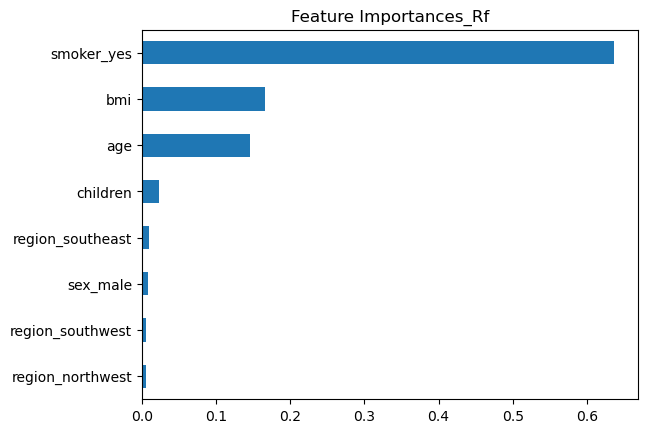

In [60]:
best_rf = grid_rf.best_estimator_
importances_Rf = best_rf.feature_importances_
feat_importances_rf = pd.Series(importances_Rf , index = features.columns)
feat_importances_rf.sort_values().plot(kind ='barh',title = 'Feature Importances_Rf')
plt.show()

<Axes: title={'center': 'Feature Importance DT'}>

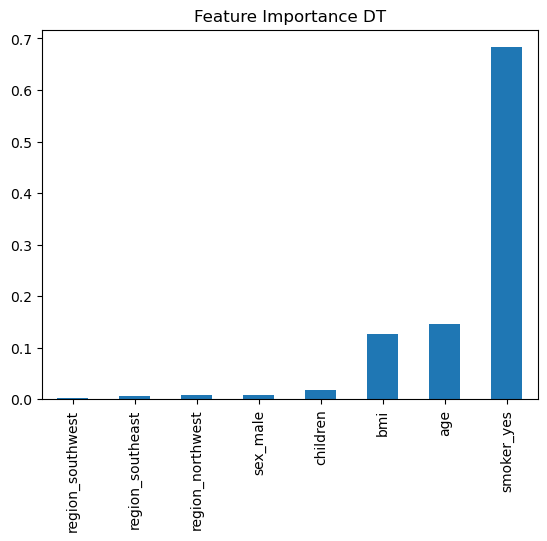

In [110]:
best_DT = grid_tree.best_estimator_
feature_importance_DT= best_DT.feature_importances_
feat_importances_DT = pd.Series(importances_DT, index=features.columns)
feat_importances_DT.sort_values().plot(kind='bar',title = "Feature Importance DT")

In [73]:
#Each bar shows how much that feature contributed (in percentage) to making the model accurate.
#A longer bar = the feature was more useful for splitting the data and reducing prediction error.
#A shorter bar = the feature was less useful.
#All bars together add up to 100% importance.

In [133]:
grid_tree_prediction = grid_tree.predict(X_test)
rf_prediction = grid_rf.predict(X_test)
svm_prediction = grid_svr.predict(X_test)
print(len(grid_tree_prediction),len(rf_prediction),len(svm_prediction))

402 402 402


C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Vasanth Ravi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [135]:
print(y_test.shape)
print(grid_tree_prediction.shape)
print(rf_prediction.shape)
print(svm_prediction.shape)

(402,)
(402,)
(402,)
(402,)


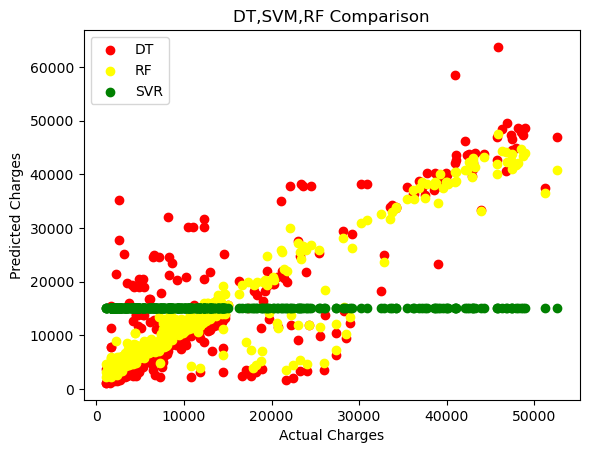

In [139]:
plt.scatter(y_test,grid_tree_prediction,color='red',label='DT')
plt.scatter(y_test,rf_prediction,color='yellow',label='RF')
plt.scatter(y_test,svm_prediction,color='green',label='SVR')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("DT,SVM,RF Comparison")
plt.legend()
plt.show()